<a href="https://colab.research.google.com/github/KashyapBhat/MyPathTowardsMachineLearning/blob/master/Tensorflow_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

### Why Machine Learning

Like every first app you should start with something super simple that shows the overall scaffolding for how your code works. 

In the case of creating neural networks, the sample I like to use is one where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules' — 


```
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

So how would you train a neural network to do the equivalent task? Using data! By feeding it with a set of Xs, and a set of Ys, it should be able to figure out the relationship between them. 

This is obviously a very different paradigm than what you might be used to, so let's step through it piece by piece.


****************************************************************************************************

# **1. Simple example problem using tf**

### Lets get started
We then import a library called numpy, which helps us to represent our data as lists easily and quickly.
The framework for defining a neural network as a set of Sequential layers is called keras, so we import that too.

In [0]:


import tensorflow as tf
import numpy as np
from tensorflow import keras

### Define the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.


In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

### Compile the Neural Network

Now we compile our Neural Network. When we do so, we have to specify 2 functions, a loss and an optimizer.

If you've seen lots of math for machine learning, here's where it's usually used, but in this case it's nicely encapsulated in functions for you. But what happens here — let's explain...

We know that in our function, the relationship between the numbers is y=2x-1. 

When the computer is trying to 'learn' that, it makes a guess...maybe y=10x+10. The LOSS function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the OPTIMIZER function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like y=5x+5, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of EPOCHS which you will see shortly. But first, here's how we tell it to use 'MEAN SQUARED ERROR' for the loss and 'STOCHASTIC GRADIENT DESCENT' for the optimizer. You don't need to understand the math for these yet, but you can see that they work! :)

Over time you will learn the different and appropriate loss and optimizer functions for different scenarios. 


In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up we'll feed in some data. In this case we are taking 6 xs and 6ys. You can see that the relationship between these is that y=2x-1, so where x = -1, y=-3 etc. etc. 

A python library called 'Numpy' provides lots of array type data structures that are a defacto standard way of doing it. We declare that we want to use these by specifying the values as an np.array[]

In [0]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Training the model

The process of training the neural network, where it 'learns' the relationship between the Xs and Ys is in the **model.fit**  call. This is where it will go through the loop we spoke about above, making a guess, measuring how good or bad it is (aka the loss), using the opimizer to make another guess etc. It will do it for the number of epochs you specify. When you run this code, you'll see the loss on the right hand side.

In [5]:
model.fit(xs, ys, epochs=500,verbose=0)

## Make a prediction

Ok, now you have a model that has been trained to learn the relationshop between X and Y. You can use the **model.predict** method to have it figure out the Y for a previously unknown X. So, for example, if X = 10, what do you think Y will be? Take a guess before you run this code:

In [6]:
print(model.predict([10.0]))

[[18.986526]]


You might have thought 19, right? But it ended up being a little under. Why do you think that is? 

Remember that neural networks deal with probabilities, so given the data that we fed the NN with, it calculated that there is a very high probability that the relationship between X and Y is Y=2X-1, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19. 

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.


**********************************************************************************************

# **2. House price prediction**

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
class PrintLogs(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def set_params(self, params):
        params['epochs'] = 0

    def on_epoch_begin(self, epoch, logs=None):
        print('Epoch %d/%d' % (epoch + 1, self.epochs), end='')

In [0]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    xs = np.array([1,2,3,4,5,6], dtype=float)
    ys = np.array([1,1.5,2,2.5,3,3.5], dtype=float)
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    model.fit(xs, ys, epochs=500, verbose=2, callbacks=[PrintLogs(500)])
    return model.predict(y_new)[0]

In [10]:
prediction = house_model([7.0])

Epoch 1/5001/1 - 0s - loss: 16.5386
Epoch 2/5001/1 - 0s - loss: 7.7090
Epoch 3/5001/1 - 0s - loss: 3.6220
Epoch 4/5001/1 - 0s - loss: 1.7300
Epoch 5/5001/1 - 0s - loss: 0.8540
Epoch 6/5001/1 - 0s - loss: 0.4481
Epoch 7/5001/1 - 0s - loss: 0.2599
Epoch 8/5001/1 - 0s - loss: 0.1724
Epoch 9/5001/1 - 0s - loss: 0.1315
Epoch 10/5001/1 - 0s - loss: 0.1122
Epoch 11/5001/1 - 0s - loss: 0.1029
Epoch 12/5001/1 - 0s - loss: 0.0982
Epoch 13/5001/1 - 0s - loss: 0.0957
Epoch 14/5001/1 - 0s - loss: 0.0941
Epoch 15/5001/1 - 0s - loss: 0.0931
Epoch 16/5001/1 - 0s - loss: 0.0922
Epoch 17/5001/1 - 0s - loss: 0.0915
Epoch 18/5001/1 - 0s - loss: 0.0908
Epoch 19/5001/1 - 0s - loss: 0.0901
Epoch 20/5001/1 - 0s - loss: 0.0894
Epoch 21/5001/1 - 0s - loss: 0.0888
Epoch 22/5001/1 - 0s - loss: 0.0881
Epoch 23/5001/1 - 0s - loss: 0.0875
Epoch 24/5001/1 - 0s - loss: 0.0868
Epoch 25/5001/1 - 0s - loss: 0.0862
Epoch 26/5001/1 - 0s - loss: 0.0856
Epoch 27/5001/1 - 0s - loss: 0.0849
Epoch 28/5001/1 - 0s - loss: 0.0843


In [11]:
print(prediction)

[4.074577]


****************************************************************************************************

# **3. Computer Vision - Fashion MNIST**

In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Representing the image
Showing the grey scale image in an array
You'll notice that all of the values in the number are between 0 and 255.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

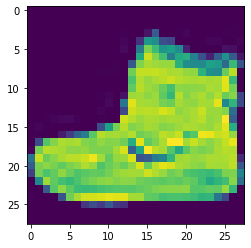

In [15]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

## Normalizing
If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Model 

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

**activation function**: Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now. 

**Relu**: effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

*Softmax* takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


**Few Questions:**<br>
1.Increase to 1024 Neurons -- What's the impact?
By adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

2.What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

3.Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

4.Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

5.Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

## Custom Callbacks
To handle the lot of things that are output while model is fitting labels to data, for that we can handle it using custom callback function.
Also we can stop training our models after they reach some perticular accuracy

In [0]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def set_params(self, params):
        params['epochs'] = 0

    def on_epoch_begin(self, epoch, logs=None):
        print('Epoch %d/%d' % (epoch + 1, self.epochs), end='')

    def on_epoch_end(self, epoch, logs={}):
        print(logs.get('accuracy'))
        if(logs.get('accuracy')>0.95):
          print("\nReached 95% accuracy so cancelling training!")
          self.model.stop_training = True

## Fit the model
Figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, verbose=2, callbacks=[CustomCallBack(50)])

Epoch 1/500.8236333131790161
1875/1875 - 3s - loss: 0.4995 - accuracy: 0.8236
Epoch 2/500.8652333617210388
1875/1875 - 3s - loss: 0.3757 - accuracy: 0.8652
Epoch 3/500.8764500021934509
1875/1875 - 3s - loss: 0.3381 - accuracy: 0.8765
Epoch 4/500.8861666917800903
1875/1875 - 3s - loss: 0.3105 - accuracy: 0.8862
Epoch 5/500.8923333287239075
1875/1875 - 3s - loss: 0.2938 - accuracy: 0.8923
Epoch 6/500.8955833315849304
1875/1875 - 3s - loss: 0.2813 - accuracy: 0.8956
Epoch 7/500.9003999829292297
1875/1875 - 3s - loss: 0.2683 - accuracy: 0.9004
Epoch 8/500.9044833183288574
1875/1875 - 3s - loss: 0.2584 - accuracy: 0.9045
Epoch 9/500.9070833325386047
1875/1875 - 3s - loss: 0.2481 - accuracy: 0.9071
Epoch 10/500.9104833602905273
1875/1875 - 3s - loss: 0.2389 - accuracy: 0.9105
Epoch 11/500.9147499799728394
1875/1875 - 3s - loss: 0.2300 - accuracy: 0.9147
Epoch 12/500.9160000085830688
1875/1875 - 3s - loss: 0.2260 - accuracy: 0.9160
Epoch 13/500.9189500212669373
1875/1875 - 3s - loss: 0.2177 -

## Evaluate
Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.89. This tells you that your neural network is about 89% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [20]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8831


[0.4239528179168701, 0.8830999732017517]

In [21]:
classifications = model.predict(test_images)

print(classifications[0])

[1.8887076e-14 4.0321366e-18 8.2243316e-15 8.3544621e-20 1.4591125e-18 4.2539699e-07 1.6922129e-14 3.8379374e-05 2.1193511e-14 9.9996114e-01]


The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.


In [22]:
print(test_labels[0])

9


Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot